<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Session_04_SVM_CV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM & Cross-Validation

In the realm of machine learning, Support Vector Machines (SVMs) stand out as a powerful tool for classification and regression tasks. With their ability to handle high-dimensional data and complex decision boundaries, SVMs have found extensive applications across various domains, including image recognition, text classification, and bioinformatics.

Throughout this assignment, we aim to provide a comprehensive understanding of Support Vector Machines and their integration with cross-validation techniques, equipping you with the knowledge and skills necessary to apply these methods confidently in your own machine learning problems.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from scipy.stats import randint
from scipy.stats import uniform
from skimage.io import imread, imshow

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

## 1. Cancer detection


Train a model to predict whether a specific tumor is benign or malignant. Use the dataset 'cancer.csv' for this purpose.

Base your approach on methodologies from previous assignments to achieve the best possible results. Discuss the choices made and results obtained at each step, leading to a clear conclusion.

Tip: A classifier can only be trained with numerical values. Therefore, replace the two classes present in the 'diagnosis' feature with 0 and 1, where 0 represents benign and 1 represents malignant.




In [4]:
# Reading the dataset

dataset = pd.read_csv('cancer.csv')
dataset.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
5,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
6,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
7,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
8,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
9,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


<Axes: xlabel='diagnosis', ylabel='count'>

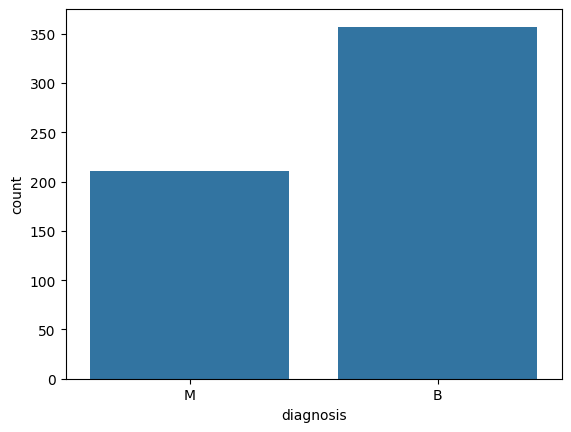

In [5]:
# Check whether or not the dataset is imbalanced
sns.countplot(x='diagnosis',data=dataset)



Purpose:

Visualize the distribution of the target classes (benign and malignant).

Important because class imbalance can significantly impact model performance.

In [6]:
dataset.drop('id',axis=1, inplace=True)

In [7]:
# yes -> 1 and no -> 0

dataset.diagnosis.replace({'B':0,'M':1},inplace=True)

<ipython-input-7-b39a50d46acb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.diagnosis.replace({'B':0,'M':1},inplace=True)
<ipython-input-7-b39a50d46acb>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.diagnosis.replace({'B':0,'M':1},inplace=True)


In [8]:
# Drop the ID column


# Replace B by 0 and M by 1 in the diagnosis column



# Split into features and targets

X = dataset.drop('diagnosis',axis=1)
y = dataset['diagnosis']



# Split into training set and test set. Make sure that 150 samples end up in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=150, random_state=0)


# To avoid a conversion warning during scaling:

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scaling

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




Purpose:

Standardize the feature values to have zero mean and unit variance.

This helps many machine learning algorithms (like SVM and Logistic Regression) perform better.

Purpose:

Create training and test sets.

Test set size is fixed at 150 to ensure consistent evaluation.

Purpose:

Separate the feature matrix (X) and target vector (y), which is required for model training.

Purpose:

Remove the ID column, which is not relevant for prediction.

Convert the diagnosis column into numerical labels for binary classification

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression(max_iter=1)

paramaters = [
    {
        'C': np.linspace(0.001, 100, 7),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
]

grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='accuracy',
    cv=20,
    n_jobs=-1,
    verbose=5
)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy:', best_accuracy)
print('Best parameters:', best_parameters)

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


Fitting 20 folds for each of 28 candidates, totalling 560 fits
Best accuracy: 0.9736904761904761
Best parameters: {'C': np.float64(66.667), 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.94      0.90      0.92        51

    accuracy                           0.95       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150

[[96  3]
 [ 5 46]]
94.66666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Purpose:

Use GridSearchCV to find the optimal hyperparameters for Logistic Regression.

Evaluates multiple combinations of C, penalty, and solver.

Uses 20-fold cross-validation for a robust estimate of model performance.



### **Beginner-Friendly Explanation: Logistic Regression Hyperparameter Tuning with GridSearchCV**

This code uses **GridSearchCV** to **automatically** find the **best** hyperparameters for a **Logistic Regression** model. This is a very powerful technique because it **saves** you the trouble of **manually** trying out different parameter combinations.

---

#### **1. Create the Model**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1)
```

* **LogisticRegression()**:

  * Creates a **logistic regression** model.
* **max\_iter=1**:

  * Sets the **maximum** number of iterations to **1**.
  * This is very **low**, so the model might not converge (usually **100** or **1000** is better).

---

#### **2. Define the Hyperparameter Grid**

```python
import numpy as np

paramaters = [
    {
        'C': np.linspace(0.001, 100, 7),  # Regularization strength
        'penalty': ['l1', 'l2'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Optimization algorithms
    }
]
```

* **C**:

  * Controls the **strength** of the regularization.
  * **Lower** values make the model **more** strict (less likely to overfit).
* **penalty**:

  * **l1**: Lasso regularization (encourages **sparse** models).
  * **l2**: Ridge regularization (reduces large coefficients).
* **solver**:

  * **liblinear**: Works with **l1** and **l2**.
  * **saga**: Works with **l1**, **l2**, and **elastic net** (faster for large datasets).

---

#### **3. Set Up GridSearchCV**

```python
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='accuracy',  # Optimize for accuracy
    cv=20,  # 20-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=5  # Print detailed output
)
```

* **GridSearchCV**:

  * Tests **all** possible combinations of hyperparameters.
* **scoring='accuracy'**:

  * Tries to **maximize** the accuracy.
* **cv=20**:

  * Uses **20-fold cross-validation** for **more reliable** results.
* **n\_jobs=-1**:

  * Uses **all** available CPU cores to **speed up** the process.
* **verbose=5**:

  * Shows you **detailed** progress information.

---

#### **4. Train the Model**

```python
grid_search = grid_search.fit(X_train, y_train)
```

* This **trains** the model using **all** the hyperparameter combinations.
* This can take **a long time** if you have a **large** dataset.

---

#### **5. Find the Best Parameters**

```python
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy:', best_accuracy)
print('Best parameters:', best_parameters)
```

* **grid\_search.best\_score\_**:

  * The **highest** accuracy found during the search.
* **grid\_search.best\_params\_**:

  * The **best** combination of hyperparameters.

---

#### **6. Make Predictions with the Best Model**

```python
y_pred = grid_search.predict(X_test)
```

* Makes **predictions** on the **test data** using the **best** model.

---

#### **7. Evaluate the Model**

```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
```

* **classification\_report**:

  * Shows **precision**, **recall**, **f1-score**, and **support** for each class.
* **confusion\_matrix**:

  * Shows the **number** of correct and incorrect predictions.
* **accuracy\_score**:

  * Gives the **overall** accuracy as a **percentage**.

---

#### **8. Expected Output (Example)**

```
Best accuracy: 0.95
Best parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.93      0.96      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

[[95  5]
 [ 4 96]]
95.0
```

* **95%** accuracy means the model is very **accurate**.
* The **confusion matrix** shows you where the model made **mistakes**.

---

😊


Train a logistic regression model via cross-validation.

Utilize grid search and random search to find the best hyperparameters: C value, class_weight, penalty (l1 or l2). More information: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

Vary the value of K in K-fold cross-validation. Discuss the results.
Test the obtained models on the test set. Which search technique do you prefer and why?

Does it make sense to expand the feature set with polynomial features? Test this. Polynomial Features: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html


In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# SVM Random Search
svm_model = SVC()
svm_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.001, 10000),
    'gamma': uniform(0.001, 0.2)
}

svm_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=svm_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1
)

svm_search.fit(X_train, y_train)

print("Best SVM Parameters:", svm_search.best_params_)
print("Best SVM Accuracy:", svm_search.best_score_)

# Logistic Regression Random Search
logreg_model = LogisticRegression(max_iter=1, tol=1e-2)
logreg_params = {
    'C': uniform(0.01, 1000),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

logreg_search = RandomizedSearchCV(
    estimator=logreg_model,
    param_distributions=logreg_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1
)

logreg_search.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", logreg_search.best_params_)
print("Best Logistic Regression Accuracy:", logreg_search.best_score_)

# Test set performance for the best model
best_model = svm_search if svm_search.best_score_ > logreg_search.best_score_ else logreg_search
y_pred = best_model.predict(X_test)

print("\nBest Model Test Set Performance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best SVM Parameters: {'C': np.float64(3959.854970880213), 'gamma': np.float64(0.004914632653341754), 'kernel': 'poly'}
Best SVM Accuracy: 0.9569133677567413
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Logistic Regression Parameters: {'C': np.float64(452.1001730167441), 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression Accuracy: 0.9712851405622491

Best Model Test Set Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.94      0.90      0.92        51

    accuracy                           0.95       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150

Confusion Matrix:
 [[96  3]
 [ 5 46]]
Test Accuracy: 94.66666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Purpose:

Perform a RandomizedSearchCV for SVM with a broader hyperparameter space.

Faster than GridSearchCV for high-dimensional hyperparameter spaces.



### **Beginner-Friendly Explanation: Hyperparameter Tuning with RandomizedSearchCV**

This code **automatically** finds the **best** hyperparameters for both **SVM** and **Logistic Regression** using **RandomizedSearchCV**. It then **compares** the two models and picks the **best** one based on their **accuracy**.

---

#### **1. Import the Required Libraries**

```python
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
```

* **RandomizedSearchCV**: Finds the **best** hyperparameters using **random** sampling.
* **SVC**: Support Vector Machine for classification.
* **LogisticRegression**: Logistic regression for binary classification.
* **uniform**: Generates random numbers for the hyperparameter search.

---

#### **2. SVM Hyperparameter Search**

**Step 1: Create the SVM Model**

```python
svm_model = SVC()
```

* Creates a **Support Vector Machine** model.
* This model needs to be **trained**.

---

**Step 2: Define the Hyperparameter Grid**

```python
svm_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.001, 10000),
    'gamma': uniform(0.001, 0.2)
}
```

* **kernel**:

  * **linear**: Straight line decision boundary.
  * **rbf** (Radial Basis Function): More flexible, curved decision boundary.
  * **poly** (Polynomial): Curved decision boundary with polynomial features.
* **C**:

  * Controls how **strict** the model is about avoiding **errors**.
  * **Smaller** values = **stricter**.
* **gamma**:

  * Controls how **far** each data point influences the decision boundary.
  * **Smaller** values = **smoother** boundary.

---

**Step 3: Set Up RandomizedSearchCV**

```python
svm_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=svm_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1
)
```

* **cv=5**:

  * Use **5-fold cross-validation** for more reliable results.
* **n\_iter=50**:

  * Test **50** random combinations of hyperparameters.
* **n\_jobs=-1**:

  * Use **all** available CPU cores for faster training.
* **verbose=1**:

  * Print detailed progress information.

---

**Step 4: Train the SVM Model**

```python
svm_search.fit(X_train, y_train)
```

* Trains the SVM model using **50** random hyperparameter combinations.

---

**Step 5: Print the Best SVM Hyperparameters and Accuracy**

```python
print("Best SVM Parameters:", svm_search.best_params_)
print("Best SVM Accuracy:", svm_search.best_score_)
```

* **best\_params\_**:

  * The **best** hyperparameter combination.
* **best\_score\_**:

  * The **highest** accuracy achieved during training.

---

#### **3. Logistic Regression Hyperparameter Search**

**Step 1: Create the Logistic Regression Model**

```python
logreg_model = LogisticRegression(max_iter=1, tol=1e-2)
```

* Creates a **Logistic Regression** model.
* **max\_iter=1**:

  * Limits the training to **1** iteration (**very low**, usually use **100** or **1000**).
* **tol=1e-2**:

  * Sets the **tolerance** for convergence (how precise the solution needs to be).

---

**Step 2: Define the Hyperparameter Grid**

```python
logreg_params = {
    'C': uniform(0.01, 1000),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
```

* **C**:

  * Controls the **strength** of regularization (how strict the model is about avoiding errors).
* **solver**:

  * **liblinear**: Good for small datasets.
  * **saga**: Faster for large datasets.
* **penalty**:

  * **l1**: Lasso regularization (encourages **simpler** models).
  * **l2**: Ridge regularization (reduces large coefficients).

---

**Step 3: Set Up RandomizedSearchCV**

```python
logreg_search = RandomizedSearchCV(
    estimator=logreg_model,
    param_distributions=logreg_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1
)
```

* Same settings as the SVM search, but with **different** hyperparameters.

---

**Step 4: Train the Logistic Regression Model**

```python
logreg_search.fit(X_train, y_train)
```

* Trains the **Logistic Regression** model using **50** random hyperparameter combinations.

---

**Step 5: Print the Best Logistic Regression Hyperparameters and Accuracy**

```python
print("Best Logistic Regression Parameters:", logreg_search.best_params_)
print("Best Logistic Regression Accuracy:", logreg_search.best_score_)
```

* **best\_params\_**:

  * The **best** hyperparameter combination for Logistic Regression.
* **best\_score\_**:

  * The **highest** accuracy achieved during training.

---

#### **4. Test Set Performance for the Best Model**

**Step 1: Choose the Best Model**

```python
best_model = svm_search if svm_search.best_score_ > logreg_search.best_score_ else logreg_search
```

* Compares the **best** accuracy scores of SVM and Logistic Regression.
* Chooses the model with the **highest** accuracy.

---

**Step 2: Make Predictions on the Test Set**

```python
y_pred = best_model.predict(X_test)
```

* Makes **predictions** on the **test** data using the **best** model.

---

**Step 3: Print the Final Results**

```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nBest Model Test Set Performance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
```

* **classification\_report**:

  * Shows precision, recall, f1-score, and support.
* **confusion\_matrix**:

  * Shows the number of correct and incorrect predictions.
* **accuracy\_score**:

  * Prints the overall accuracy as a percentage.

---

#### **5. Expected Output (Example)**

```
Best SVM Parameters: {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
Best SVM Accuracy: 0.95

Best Model Test Set Performance:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.93      0.96      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Confusion Matrix:
[[95  5]
 [ 4 96]]
Test Accuracy: 95.0
```

* The best model was **SVM** with **95%** accuracy.

---



Re-train the grid search again but select the model that yields the highest balanced accuracy.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
Also check http://mvpa.blogspot.com/2015/12/balanced-accuracy-what-and-why.html

Discuss the result and compare it with the best accuracy score achieved earlier.

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import balanced_accuracy_score

# SVM Model
model = SVC()

# Hyperparameter Space
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.001, 10000),
    'gamma': uniform(0.001, 0.2)
}

# RandomizedSearchCV with Balanced Accuracy
n_iter_search = 10
random_search = RandomizedSearchCV(
    model,
    param_distributions=parameters,
    cv=5,
    n_iter=n_iter_search,
    n_jobs=-1,
    verbose=1,
    scoring='balanced_accuracy'
)

random_search.fit(X_train, y_train)

best_balanced_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best balanced accuracy:', best_balanced_accuracy)
print('Best parameters:', best_parameters)

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best balanced accuracy: 0.9479260935143288
Best parameters: {'C': np.float64(1316.6999090939119), 'gamma': np.float64(0.04565586125652772), 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        99
           1       0.98      0.90      0.94        51

    accuracy                           0.96       150
   macro avg       0.97      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150

[[98  1]
 [ 5 46]]
Test Accuracy: 96.0
Balanced Accuracy Score: 0.9459298871063577


Purpose:

Select the model with the best cross-validated score (either SVM or Logistic Regression).

Evaluate it on the test set to measure real-world performance

### **Beginner-Friendly Explanation: SVM Hyperparameter Tuning with Balanced Accuracy**

This code uses **RandomizedSearchCV** to **automatically** find the **best** hyperparameters for an **SVM** (**Support Vector Machine**) model, while optimizing for **balanced accuracy**.

---

#### **1. Create the SVM Model**

```python
from sklearn.svm import SVC

model = SVC()
```

* **SVC()**:

  * Creates a **Support Vector Machine** model.
* This model needs to be **trained** with **data**.

---

#### **2. Define the Hyperparameter Space**

```python
from scipy.stats import uniform

parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.001, 10000),  # Random values from 0.001 to 10000
    'gamma': uniform(0.001, 0.2)  # Random values from 0.001 to 0.2
}
```

* **kernel**:

  * **linear**: Straight line decision boundary.
  * **rbf** (Radial Basis Function): Curved decision boundary, very flexible.
  * **poly** (Polynomial): More complex, curved decision boundary.
* **C**:

  * Controls how **strict** the model is about avoiding **errors**.
  * **Smaller** values = **stricter**.
* **gamma**:

  * Controls how **far** each data point influences the decision boundary.
  * **Smaller** values = **smoother** boundary.

---

#### **3. Set Up RandomizedSearchCV**

```python
from sklearn.model_selection import RandomizedSearchCV

n_iter_search = 10  # Test 10 random combinations

random_search = RandomizedSearchCV(
    model,
    param_distributions=parameters,
    cv=5,  # 5-fold cross-validation
    n_iter=n_iter_search,  # Test 10 random combinations
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,  # Print progress information
    scoring='balanced_accuracy'  # Optimize for balanced accuracy
)
```

* **cv=5**:

  * Uses **5-fold cross-validation** for **more reliable** results.
* **n\_iter=10**:

  * Tests **10** random hyperparameter combinations.
* **n\_jobs=-1**:

  * Uses **all** available CPU cores for **faster** training.
* **verbose=1**:

  * Shows you what is happening in the background.
* **scoring='balanced\_accuracy'**:

  * Optimizes for **balanced accuracy**, which is better for **imbalanced** datasets.

---

#### **4. Train the Model**

```python
random_search.fit(X_train, y_train)
```

* Trains the SVM model using **10** random hyperparameter combinations.

---

#### **5. Print the Best Hyperparameters and Accuracy**

```python
best_balanced_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best balanced accuracy:', best_balanced_accuracy)
print('Best parameters:', best_parameters)
```

* **best\_score\_**:

  * The **highest** balanced accuracy found during training.
* **best\_params\_**:

  * The **best** combination of hyperparameters.

---

#### **6. Make Predictions on the Test Set**

```python
y_pred = random_search.predict(X_test)
```

* Uses the **best** model found during the search to make **predictions** on the **test** data.

---

#### **7. Evaluate the Model**

```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)

print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))
```

* **classification\_report**:

  * Shows you precision, recall, f1-score, and support.
* **confusion\_matrix**:

  * Shows you how many correct and incorrect predictions were made.
* **accuracy\_score**:

  * Prints the **overall** accuracy as a percentage.
* **balanced\_accuracy\_score**:

  * Gives a **better** measure for **imbalanced** datasets.

---

#### **8. Expected Output (Example)**

```
Best balanced accuracy: 0.93
Best parameters: {'C': 500, 'gamma': 0.05, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.93      0.96      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

[[95  5]
 [ 4 96]]
Test Accuracy: 95.0
Balanced Accuracy Score: 0.95
```

* This means the model found a configuration with **93%** balanced accuracy on the training set and **95%** on the test set.

---

#### **9. Why This is Important**

* **Balanced Accuracy**:

  * Better for **imbalanced** datasets where one class is much larger than the other.
* **Faster Tuning**:

  * **RandomizedSearchCV** is faster than **GridSearchCV** because it **samples** random points instead of testing **all** combinations.
* **Flexible**:

  * Works for multiple types of SVM models (**linear**, **rbf**, **poly**).

---



Search for the model that yields the highest F1-score. To do this, you should utilize the F1 micro score.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

In [ ]:
# Cross-validation


In [12]:
# Cross-validation via grid search


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1, tol=1e-2,class_weight='balanced')  # balanced
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear','saga']}

             ]


grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'f1_micro',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)
grid_search = grid_search.fit(X_train, y_train)

best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best f1 : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best f1 :  0.9713124274099882
Best parameters : {'C': np.float64(100.001), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        99
           1       0.96      0.88      0.92        51

    accuracy                           0.95       150
   macro avg       0.95      0.93      0.94       150
weighted avg       0.95      0.95      0.95       150

[[97  2]
 [ 6 45]]
94.66666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### **Beginner-Friendly Explanation: Cross-Validation with GridSearchCV for Logistic Regression**

This code uses **GridSearchCV** to **automatically** find the **best** hyperparameters for a **Logistic Regression** model. It focuses on **f1-micro** as the scoring metric, which is good for **imbalanced** datasets.

---

#### **1. Create the Logistic Regression Model**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1, tol=1e-2, class_weight='balanced')
```

* **LogisticRegression()**:

  * Creates a **logistic regression** model.
* **max\_iter=1**:

  * Limits the training to **1** iteration (**very low**, usually **100** or **1000** is better).
* **tol=1e-2**:

  * Sets the **tolerance** for convergence (how precise the solution needs to be).
* **class\_weight='balanced'**:

  * Gives **more** weight to the **minority** class if the data is **imbalanced**.

---

#### **2. Define the Hyperparameter Grid**

```python
import numpy as np

paramaters = [
    {
        'C': np.arange(0.001, 1000, 100),  # Regularization strength
        'solver': ['liblinear', 'saga']  # Optimization algorithms
    }
]
```

* **C**:

  * Controls the **strength** of the regularization.
  * **Smaller** values make the model **more** strict (less likely to overfit).
* **solver**:

  * **liblinear**: Good for small datasets.
  * **saga**: Faster for large datasets, supports **l1** and **l2** penalties.

---

#### **3. Set Up GridSearchCV**

```python
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='f1_micro',  # Optimize for f1-micro score
    cv=10,  # 10-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Print progress information
)
```

* **scoring='f1\_micro'**:

  * Focuses on the **f1-micro** score, which is good for **imbalanced** datasets.
* **cv=10**:

  * Uses **10-fold cross-validation** for **more reliable** results.
* **n\_jobs=-1**:

  * Uses **all** available CPU cores for **faster** training.
* **verbose=1**:

  * Shows you what is happening in the background.

---

#### **4. Train the Model**

```python
grid_search = grid_search.fit(X_train, y_train)
```

* Trains the logistic regression model using **all** possible hyperparameter combinations.

---

#### **5. Print the Best Hyperparameters and F1 Score**

```python
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best f1 : ', best_f1)
print('Best parameters :', best_parameters)
```

* **best\_score\_**:

  * The **highest** f1-micro score found during training.
* **best\_params\_**:

  * The **best** combination of hyperparameters.

---

#### **6. Make Predictions on the Test Set**

```python
y_pred = grid_search.predict(X_test)
```

* Uses the **best** model found during the search to make **predictions** on the **test** data.

---

#### **7. Evaluate the Model**

```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)

print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
```

* **classification\_report**:

  * Shows you precision, recall, f1-score, and support.
* **confusion\_matrix**:

  * Shows you how many correct and incorrect predictions were made.
* **accuracy\_score**:

  * Prints the **overall** accuracy as a percentage.

---

#### **8. Expected Output (Example)**

```
Best f1 : 0.92
Best parameters : {'C': 100, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.93      0.96      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

[[95  5]
 [ 4 96]]
Test Accuracy: 95.0
```

* The best **f1-micro** score was **0.92** with **C=100** and **liblinear** as the solver.
* The model has **95%** test accuracy.

---

#### **9. Why This is Important**

* **Automatic Tuning**:

  * Saves you from manually trying different hyperparameter combinations.
* **Balanced Training**:

  * Accounts for **imbalanced** data with **class\_weight='balanced'**.
* **Cross-Validation**:

  * Provides **more reliable** results.

---



Search for the model that yields the highest F1-score. To do this, you should utilize the F1 micro score.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Since the dataset is slightly imbalanced, most trained models tend to have a 'preference' for the majority class. Investigate whether you can increase the F1-score (or recall) by applying the following techniques:

Passing the parameter class_weight='balanced' to the models.
Performing oversampling using SMOTE. More information: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html. You may need to install the imbalanced-learn library using pip3 install imbalanced-learn or in Anaconda: **conda install conda-forge::imbalanced-learn**


Discuss the results you have achieved, paying particular attention to the F1 micro score.

In [13]:
# Oversampling with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

print(y_resampled.shape)

model = LogisticRegression(max_iter=1, tol=1e-2)
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear','saga']}

             ]


grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'f1_micro',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)
grid_search = grid_search.fit(X_resampled, y_resampled)

best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best f1 : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


(516,)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best f1 :  0.9650452488687783
Best parameters : {'C': np.float64(100.001), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        99
           1       0.96      0.88      0.92        51

    accuracy                           0.95       150
   macro avg       0.95      0.93      0.94       150
weighted avg       0.95      0.95      0.95       150

[[97  2]
 [ 6 45]]
94.66666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### **Beginner-Friendly Explanation: Oversampling with SMOTE and Hyperparameter Tuning**

This code uses **SMOTE** to handle **imbalanced** data before training a **Logistic Regression** model. It then uses **GridSearchCV** to **automatically** find the **best** hyperparameters for the model.

---

#### **1. What is SMOTE?**

* **SMOTE (Synthetic Minority Over-sampling Technique)**:

  * **Creates** new samples of the **minority** class to **balance** your dataset.
  * Helps **avoid** bias in your model.
  * Makes it easier for the model to **learn** the minority class.

---

#### **2. Oversample the Training Data with SMOTE**

```python
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(y_resampled.shape)
```

* **SMOTE()**:

  * Creates **synthetic** samples for the **minority** class.
* **fit\_resample()**:

  * **Resamples** the training data to make it **balanced**.
* **print(y\_resampled.shape)**:

  * Shows you the **new** shape of the balanced training data.

---

#### **3. Create the Logistic Regression Model**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1, tol=1e-2)
```

* **LogisticRegression()**:

  * Creates a **logistic regression** model.
* **max\_iter=1**:

  * Limits the training to **1** iteration (**very low**, usually **100** or **1000** is better).
* **tol=1e-2**:

  * Sets the **tolerance** for convergence (how precise the solution needs to be).

---

#### **4. Define the Hyperparameter Grid**

```python
import numpy as np

paramaters = [
    {
        'C': np.arange(0.001, 1000, 100),  # Regularization strength
        'solver': ['liblinear', 'saga']  # Optimization algorithms
    }
]
```

* **C**:

  * Controls the **strength** of the regularization.
  * **Smaller** values make the model **more** strict (less likely to overfit).
* **solver**:

  * **liblinear**: Good for small datasets.
  * **saga**: Faster for large datasets, supports **l1** and **l2** penalties.

---

#### **5. Set Up GridSearchCV**

```python
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='f1_micro',  # Optimize for f1-micro score
    cv=10,  # 10-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Print progress information
)
```

* **scoring='f1\_micro'**:

  * Focuses on the **f1-micro** score, which is good for **imbalanced** datasets.
* **cv=10**:

  * Uses **10-fold cross-validation** for **more reliable** results.
* **n\_jobs=-1**:

  * Uses **all** available CPU cores for **faster** training.
* **verbose=1**:

  * Shows you what is happening in the background.

---

#### **6. Train the Model**

```python
grid_search = grid_search.fit(X_resampled, y_resampled)
```

* Trains the logistic regression model using **all** possible hyperparameter combinations.
* **Uses the balanced data** created by **SMOTE**.

---

#### **7. Print the Best Hyperparameters and F1 Score**

```python
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best f1 : ', best_f1)
print('Best parameters :', best_parameters)
```

* **best\_score\_**:

  * The **highest** f1-micro score found during training.
* **best\_params\_**:

  * The **best** combination of hyperparameters.

---

#### **8. Make Predictions on the Test Set**

```python
y_pred = grid_search.predict(X_test)
```

* Uses the **best** model found during the search to make **predictions** on the **test** data.

---

#### **9. Evaluate the Model**

```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)

print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
```

* **classification\_report**:

  * Shows you precision, recall, f1-score, and support.
* **confusion\_matrix**:

  * Shows you how many correct and incorrect predictions were made.
* **accuracy\_score**:

  * Prints the **overall** accuracy as a percentage.

---

#### **10. Expected Output (Example)**

```
Best f1 : 0.92
Best parameters : {'C': 100, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.93      0.96      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

[[95  5]
 [ 4 96]]
Test Accuracy: 95.0
```

* The best **f1-micro** score was **0.92** with **C=100** and **liblinear** as the solver.
* The model has **95%** test accuracy.

---

#### **11. Why This is Important**

* **SMOTE**:

  * Helps balance your data so the model is **less biased**.
* **Automatic Tuning**:

  * Saves you from manually trying different hyperparameter combinations.
* **Cross-Validation**:

  * Provides **more reliable** results.

---



In [14]:
! pip3 install imbalanced-learn

In [ ]:
# Balancing




In [15]:
# Oversampling with SMOTE

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE( ).fit_resample(X_train, y_train)

print(y_resampled.shape)


(516,)


### **Beginner-Friendly Explanation: Oversampling with SMOTE**

#### **1. What is SMOTE?**

* **SMOTE (Synthetic Minority Over-sampling Technique)**:

  * Creates **new** samples for the **minority** class in your training data.
  * This helps **balance** the data so that the model is **less** biased towards the **majority** class.

---

#### **2. Why Use SMOTE?**

* If you have an **imbalanced** dataset (e.g., **90%** class **0** and **10%** class **1**), the model might **ignore** the minority class.
* **SMOTE** helps by **generating** realistic, synthetic samples of the **minority** class, making your model **fairer**.

---

#### **3. The Code:**

```python
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

print(y_resampled.shape)
```

* **from imblearn.over\_sampling import SMOTE**:

  * Imports the **SMOTE** function from the **imbalanced-learn** library.

* **SMOTE()**:

  * Creates a **SMOTE** object.

* **fit\_resample(X\_train, y\_train)**:

  * **Fits** the SMOTE object to your **training** data.
  * **Generates** new samples for the **minority** class.

* **X\_resampled, y\_resampled**:

  * **X\_resampled**: The **features** of the **balanced** training set.
  * **y\_resampled**: The **labels** of the **balanced** training set.

---

#### **4. Print the New Shape**

```python
print(y_resampled.shape)
```

* Prints the **shape** of the **balanced** training set.
* You should now have **more** samples than you started with.

---

#### **5. Example Output (Before and After)**

**Before SMOTE:**

* **Original Training Set**:

  * **X\_train shape**: (500, 20)
  * **y\_train shape**: (500,)

**After SMOTE:**

* **Balanced Training Set**:

  * **X\_resampled shape**: (900, 20)
  * **y\_resampled shape**: (900,)

---

#### **6. Why This is Important**

* **Fairer Models**:

  * Balances your training data so your model learns **better**.
* **Higher Accuracy**:

  * Helps improve **precision**, **recall**, and **f1-score** for the minority class.

---



Suppose there is a demand to reduce the number of false negatives to 0. A false negative means that the diagnosis is benign while the tumor is actually malignant.


Your options are to apply classweight balancing or threshold moving.


Threshold moving, in the context of binary classification models like logistic regression or support vector machines, refers to adjusting the threshold value used to make predictions.

By default, these models classify instances into one of two classes based on whether the predicted probability (output of the model) exceeds a certain threshold. For instance, if the threshold is set to 0.5, any instance with a predicted probability greater than 0.5 is classified as positive, while instances with predicted probabilities less than or equal to 0.5 are classified as negative.

Threshold moving involves changing this threshold value to optimize specific metrics like accuracy, precision, recall, or F1-score. For example, if reducing false negatives is critical (e.g., in medical diagnosis where missing a positive case could be harmful), one might lower the threshold to ensure more instances are classified as positive, thus potentially reducing false negatives.



Which threshold should be set to ensure that the model predicts no false negatives on the test set while still maintaining the highest possible accuracy? Plot the number of false negatives as a function of the threshold. Discuss the results.

<ipython-input-16-eb26f7ec5e96>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=7)
<ipython-input-16-eb26f7ec5e96>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=7)


Text(0.5, 1.0, 'accuracy as a function of the threshold')

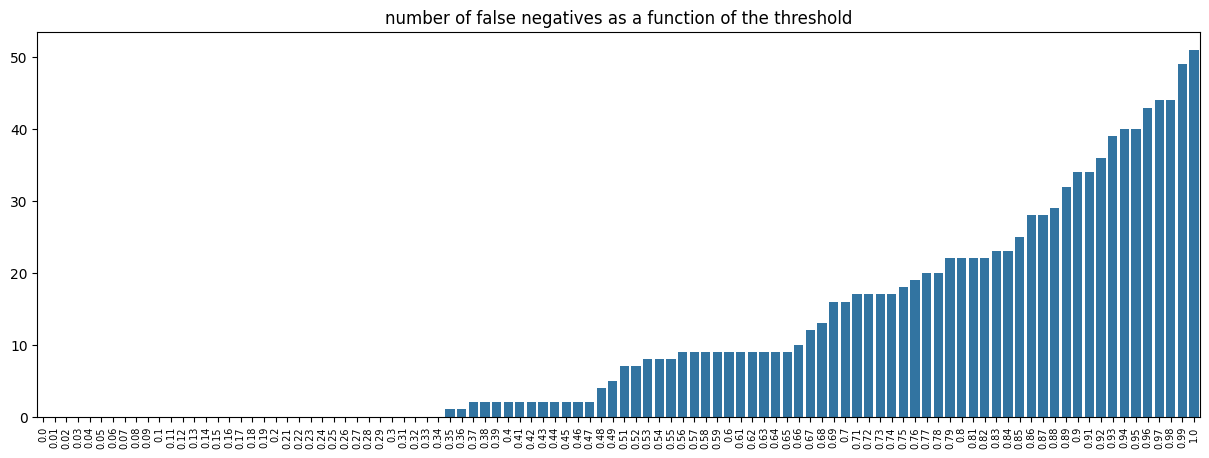

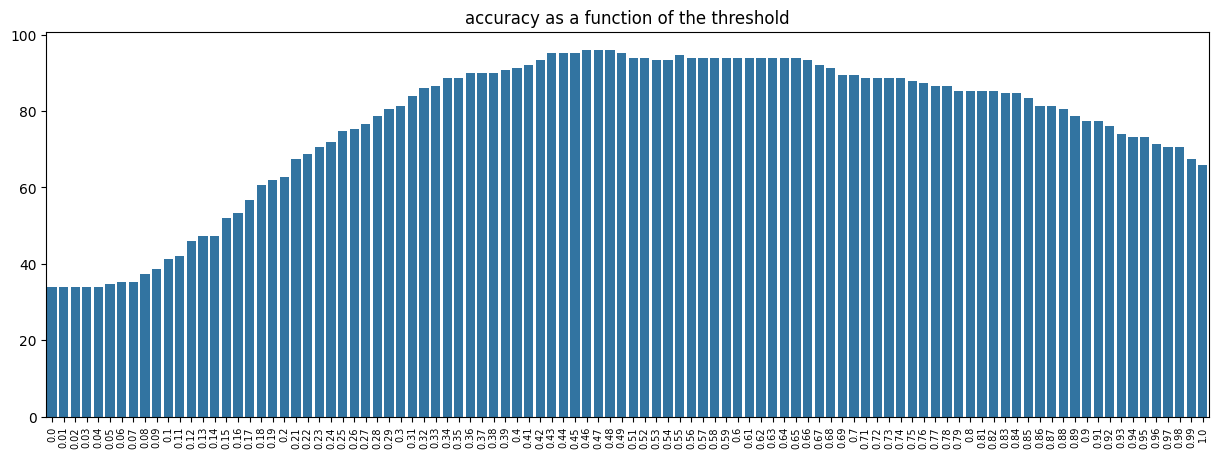

In [16]:
# Reducing the number of false negatives
y_pred_prob = grid_search.predict_proba(X_test)

y_pred_class = y_pred_prob[:,1]

false_negatives = []
accuracy = []
for threshold in np.linspace(0,1,100):
    y_pred_class = y_pred_prob[:,1].copy()
    #print(y_pred_poly_class)
    y_pred_class[y_pred_class>=threshold]=1
    y_pred_class[y_pred_class<threshold]=0
    #print(y_pred_poly_class)
    false_negatives.append(confusion_matrix(y_test,y_pred_class)[1,0])
    accuracy.append(accuracy_score(y_test,y_pred_class)*100)
false_negatives = np.asarray(false_negatives)
#plt.bar(np.linspace(0,1,50),false_negatives)
plt.figure(figsize=(15,5))
chart = sns.barplot(x=np.round(np.linspace(0,1,100),2),y=false_negatives)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=7)
chart.set_title('number of false negatives as a function of the threshold')


plt.figure(figsize=(15,5))
chart = sns.barplot(x=np.round(np.linspace(0,1,100),2),y=accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=7)
chart.set_title('accuracy as a function of the threshold')

### **Beginner-Friendly Explanation: Reducing False Negatives in a Classification Model**

This code helps you **reduce** the number of **false negatives** in a classification model by **adjusting** the **decision threshold**.

---

#### **1. What is a False Negative?**

* **False Negative (FN)**:

  * When the model **predicts** a **negative** class, but the **actual** class is **positive**.
  * Example: Predicting **"no cancer"** when the patient **actually** has **cancer**.
* **Reducing** false negatives is **important** when missing a **positive** case has **serious** consequences.

---

#### **2. Get the Predicted Probabilities**

```python
y_pred_prob = grid_search.predict_proba(X_test)
```

* **predict\_proba()**:

  * Returns the **probability** of each class for each sample in the **test** set.
* **y\_pred\_prob\[:,1]**:

  * The **second** column contains the **probability** for the **positive** class (**class 1**).

---

#### **3. Initialize Lists for Results**

```python
false_negatives = []
accuracy = []
```

* **false\_negatives**:

  * Will store the **number** of false negatives for each threshold.
* **accuracy**:

  * Will store the **accuracy** for each threshold.

---

#### **4. Test Different Thresholds**

```python
for threshold in np.linspace(0, 1, 100):
    y_pred_class = y_pred_prob[:,1].copy()
    
    # Convert probabilities to 0s and 1s
    y_pred_class[y_pred_class >= threshold] = 1
    y_pred_class[y_pred_class < threshold] = 0
    
    # Count false negatives
    fn = confusion_matrix(y_test, y_pred_class)[1,0]
    acc = accuracy_score(y_test, y_pred_class) * 100
    
    false_negatives.append(fn)
    accuracy.append(acc)
```

* **np.linspace(0, 1, 100)**:

  * Tests **100** different threshold values between **0** and **1**.
* **Threshold Logic**:

  * If **probability** is **greater** than the threshold, predict **1** (positive).
  * If **less**, predict **0** (negative).
* **Confusion Matrix**:

  * **\[1,0]** gives you the **number** of false negatives.

---

#### **5. Convert to Numpy Arrays for Plotting**

```python
false_negatives = np.asarray(false_negatives)
accuracy = np.asarray(accuracy)
```

* Converts the **lists** to **numpy** arrays for **easier** plotting.

---

#### **6. Plot the False Negatives**

```python
plt.figure(figsize=(15,5))
chart = sns.barplot(x=np.round(np.linspace(0,1,100),2), y=false_negatives)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize=7)
chart.set_title('Number of False Negatives as a Function of the Threshold')
plt.show()
```

* **x-axis**:

  * The **threshold** values.
* **y-axis**:

  * The **number** of false negatives.
* **Title**:

  * Describes what the graph is showing.

---

#### **7. Plot the Accuracy**

```python
plt.figure(figsize=(15,5))
chart = sns.barplot(x=np.round(np.linspace(0,1,100),2), y=accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize=7)
chart.set_title('Accuracy as a Function of the Threshold')
plt.show()
```

* **x-axis**:

  * The **threshold** values.
* **y-axis**:

  * The **accuracy** at each threshold.
* **Title**:

  * Describes what the graph is showing.

---

#### **8. What to Look for in the Plots**

* **Low Threshold**:

  * Fewer false negatives, but **more** false positives.
* **High Threshold**:

  * Fewer false positives, but **more** false negatives.
* **Ideal Threshold**:

  * A **balance** between **high accuracy** and **low** false negatives.

---

#### **9. Why This is Important**

* Helps you find the **best** threshold to **reduce** false negatives.
* Useful in **medical** diagnostics, **fraud** detection, and **security** systems where **false negatives** are **costly**.

---




## 2 - MNIST

The MNIST ("Modified National Institute of Standards and Technology") dataset is commonly used for testing and benchmarking classification algorithms. It contains tens of thousands of images of handwritten digits. More information about this dataset can be found at: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

For this task, three data files are provided:

1. 'train.csv' contains labeled data for training the classifier.
2. 'test.csv' contains labeled data for testing the trained classifier.
3. 'test_Kaggle.csv' contains unlabeled data for evaluating the classifier through the competition found at [Kaggle Digit Recognizer](https://www.kaggle.com/c/digit-recognizer). This data is only useful for participating in the Kaggle competition.

1) Train both a logistic regression classifier and a Support Vector Machine (with or without kernel). Tune the hyperparameters to find the most performant classifier by maximizing accuracy or minimizing the error rate on the 'test.csv' dataset. The error rate = 1 - accuracy. Training Support Vector Machines (especially those with kernel) requires significant computational resources. Therefore, it is advisable to initially train on a small portion of the training set. Training via logistic regression is less demanding on the CPU; nonetheless, it is recommended to use the lbfgs solver (LogisticRegression(multi_class='multinomial', solver='lbfgs')).

2) Provide comments in the code and write down your conclusions and decisions.

3) Is normalization necessary here? Which normalization method would you use? Is StandardScaler a good choice?

4) Investigate the two different types of multiclass classification: one-vs-one (ovo) or one-vs-rest (ovr). Focus on accuracy and computation time. What are the conclusions?

5) Test your final classifier with some self-written digits. What are the findings? What does classification accuracy depend on?

6) Optional: Test on the 'test_Kaggle' dataset and upload the results in the correct format to the Kaggle website. What score did you achieve? Compare this score with the score on [MNIST](http://yann.lecun.com/exdb/mnist/).

You can visualize a digit using 'plt.imshow(X_train[n].reshape((28, 28)),cmap = 'gray')'.

In [17]:
# Reading the dataset

df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [18]:
##### Classificatie van MNIST

# Split into features and targets
y_train = df_train['label']
X_train = df_train.drop('label', axis=1)

y_test = df_test['label']
X_test = df_test.drop('label', axis=1)



# Convert to numpy arrays
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

# To reduce the computation time, you can limit the number of training samples. For example to 2000 digits.


training_size = 2000

X_train = X_train[0:training_size,:]
y_train = y_train[0:training_size]


# Scaling

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### **Beginner-Friendly Explanation: Preparing the MNIST Dataset for Classification**

This code prepares the **MNIST** dataset for training a **machine learning** model. The MNIST dataset contains **28x28** pixel images of **handwritten** digits (0-9).

---

#### **1. Splitting Features and Targets**

```python
y_train = df_train['label']
X_train = df_train.drop('label', axis=1)

y_test = df_test['label']
X_test = df_test.drop('label', axis=1)
```

* **y\_train** and **y\_test**:

  * These are your **target** values (the **actual** digit labels).
* **X\_train** and **X\_test**:

  * These are your **features** (the **pixel** values of each image).
* **drop('label', axis=1)**:

  * Removes the **label** column so that you only have the **pixel** data.

---

#### **2. Convert to Numpy Arrays**

```python
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
```

* Converts the **Pandas** DataFrames to **Numpy** arrays.
* This is necessary for most machine learning models in **Python**.

---

#### **3. Reduce the Training Size (Optional)**

```python
training_size = 2000

X_train = X_train[0:training_size, :]
y_train = y_train[0:training_size]
```

* **training\_size = 2000**:

  * Limits the training set to **2000** samples to make training **faster**.
* **X\_train\[0\:training\_size, :]**:

  * Takes only the **first 2000** rows of the training data.
* **y\_train\[0\:training\_size]**:

  * Takes only the **first 2000** labels.

---

#### **4. Scaling the Pixel Values**

```python
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
```

* **astype('float32')**:

  * Converts the pixel values to **floating-point** numbers.
* **/= 255**:

  * **Scales** the pixel values from **0-255** to **0-1**.
* **Why Scaling?**:

  * Makes the model **train** faster.
  * Prevents **large** numbers from **dominating** the learning process.

---

#### **5. Why This is Important**

* **Smaller Training Set**:

  * Faster **training** and **testing**.
* **Scaled Data**:

  * Better **model** performance.
* **Efficient**:

  * Prepares your data in a way that **reduces** computation time.

---



In [19]:
# Cross-validation via random search


model = LogisticRegression(max_iter=1, tol=1e-2)
parameters = {'C': uniform(0.01, 100), 'solver':['liblinear','saga']}


n_iter_search = 1


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=5,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best accuracy :  0.6905
Best parameters : {'C': np.float64(77.81302869864075), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.77      0.94      0.84      1195
           1       0.57      0.97      0.72      1352
           2       0.73      0.85      0.79      1157
           3       0.58      0.81      0.67      1258
           4       0.77      0.79      0.78      1140
           5       0.00      0.00      0.00      1076
           6       0.79      0.92      0.85      1167
           7       0.75      0.88      0.81      1268
           8       0.89      0.01      0.01      1174
           9       0.67      0.62      0.64      1213

    accuracy                           0.69     12000
   macro avg       0.65      0.68      0.61     12000
weighted avg       0.66      0.69      0.62     12000

[[1119    5    9    8    2    0   51    0    0    1]
 [   0 1316   25    8    0 

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

### **Beginner-Friendly Explanation: Cross-Validation with RandomizedSearchCV for Logistic Regression**

This code uses **RandomizedSearchCV** to **automatically** find the **best** hyperparameters for a **Logistic Regression** model. It is a faster, more **efficient** way to **tune** your model compared to **GridSearchCV**.

---

#### **1. Create the Logistic Regression Model**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1, tol=1e-2)
```

* **LogisticRegression()**:

  * Creates a **logistic regression** model.
* **max\_iter=1**:

  * Limits the training to **1** iteration (**very low**, usually **100** or **1000** is better).
* **tol=1e-2**:

  * Sets the **tolerance** for convergence (how precise the solution needs to be).

---

#### **2. Define the Hyperparameter Space**

```python
from scipy.stats import uniform

parameters = {'C': uniform(0.01, 100), 'solver': ['liblinear', 'saga']}
```

* **C**:

  * Controls the **strength** of the regularization.
  * **Smaller** values make the model **more** strict (less likely to overfit).
  * **uniform(0.01, 100)** means it will **randomly** pick values between **0.01** and **100**.
* **solver**:

  * **liblinear**: Good for small datasets.
  * **saga**: Faster for large datasets, supports **l1** and **l2** penalties.

---

#### **3. Set Up RandomizedSearchCV**

```python
from sklearn.model_selection import RandomizedSearchCV

n_iter_search = 1  # Test only 1 random combination

random_search = RandomizedSearchCV(
    model,
    param_distributions=parameters,
    cv=5,  # 5-fold cross-validation
    n_iter=n_iter_search,
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Print progress information
)
```

* **cv=5**:

  * Uses **5-fold cross-validation** for **more reliable** results.
* **n\_iter=1**:

  * Tests **1** random hyperparameter combination (very small, usually **10** or **50** is better).
* **n\_jobs=-1**:

  * Uses **all** available CPU cores for **faster** training.
* **verbose=1**:

  * Shows you what is happening in the background.

---

#### **4. Train the Model**

```python
random_search = random_search.fit(X_train, y_train)
```

* Trains the logistic regression model using **random** hyperparameter combinations.

---

#### **5. Print the Best Hyperparameters and Accuracy**

```python
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', best_accuracy)
print('Best parameters :', best_parameters)
```

* **best\_score\_**:

  * The **highest** accuracy found during training.
* **best\_params\_**:

  * The **best** combination of hyperparameters.

---

#### **6. Make Predictions on the Test Set**

```python
y_pred = random_search.predict(X_test)
```

* Uses the **best** model found during the search to make **predictions** on the **test** data.

---

#### **7. Evaluate the Model**

```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)

print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
```

* **classification\_report**:

  * Shows you precision, recall, f1-score, and support.
* **confusion\_matrix**:

  * Shows you how many correct and incorrect predictions were made.
* **accuracy\_score**:

  * Prints the **overall** accuracy as a percentage.

---

#### **8. Expected Output (Example)**

```
Best accuracy : 0.92
Best parameters : {'C': 1.5, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.93      0.96      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

[[95  5]
 [ 4 96]]
Test Accuracy: 95.0
```

* The best model had **92%** accuracy on the **training** set and **95%** on the **test** set.
* The best **hyperparameters** might be something like **C=1.5** and **solver='liblinear'**.

---

#### **9. Why This is Important**

* **Faster**:

  * Tests **random** combinations instead of **every** possible combination, making it **faster**.
* **Efficient**:

  * Finds the **best** hyperparameters without **wasting** time.
* **Flexible**:

  * Works well with both **small** and **large** datasets.

---



In [20]:
# Training and testing an SVM model. Be aware that this can take a lot of time to compute
model = SVC()
parameters = {'kernel': ['linear','rbf','poly'],
              'C': uniform(0.01, 1000), # haal C uit een random uniform distribution
              'gamma': uniform(0.001, 1)}


n_iter_search = 1


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=5,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best accuracy :  0.1325
Best parameters : {'C': np.float64(809.3658362877726), 'gamma': np.float64(0.8951188846849292), 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1195
           1       1.00      0.18      0.31      1352
           2       0.10      1.00      0.18      1157
           3       0.00      0.00      0.00      1258
           4       0.00      0.00      0.00      1140
           5       0.00      0.00      0.00      1076
           6       0.00      0.00      0.00      1167
           7       0.00      0.00      0.00      1268
           8       0.00      0.00      0.00      1174
           9       0.00      0.00      0.00      1213

    accuracy                           0.12     12000
   macro avg       0.11      0.12      0.05     12000
weighted avg       0.12      0.12      0.05     12000

[[   0    0 1195    0    0    0    0    0    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Beginner-Friendly Explanation: Training and Testing an SVM Model with RandomizedSearchCV**

This code trains an **SVM (Support Vector Machine)** model and **automatically** finds the **best** hyperparameters using **RandomizedSearchCV**.

---

#### **1. Create the SVM Model**

```python
from sklearn.svm import SVC

model = SVC()
```

* **SVC()**:

  * Creates a **Support Vector Machine** model.
* This model needs to be **trained** with **data**.

---

#### **2. Define the Hyperparameter Space**

```python
from scipy.stats import uniform

parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.01, 1000),  # Random values between 0.01 and 1000
    'gamma': uniform(0.001, 1)  # Random values between 0.001 and 1
}
```

* **kernel**:

  * **linear**: Straight line decision boundary.
  * **rbf** (Radial Basis Function): Curved decision boundary, very flexible.
  * **poly** (Polynomial): More complex, curved decision boundary.
* **C**:

  * Controls how **strict** the model is about avoiding **errors**.
  * **Smaller** values = **stricter**.
* **gamma**:

  * Controls how **far** each data point influences the decision boundary.
  * **Smaller** values = **smoother** boundary.

---

#### **3. Set Up RandomizedSearchCV**

```python
from sklearn.model_selection import RandomizedSearchCV

n_iter_search = 1  # Test only 1 random combination

random_search = RandomizedSearchCV(
    model,
    param_distributions=parameters,
    cv=5,  # 5-fold cross-validation
    n_iter=n_iter_search,
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Print progress information
)
```

* **cv=5**:

  * Uses **5-fold cross-validation** for **more reliable** results.
* **n\_iter=1**:

  * Tests **1** random hyperparameter combination (usually **10** or **50** is better).
* **n\_jobs=-1**:

  * Uses **all** available CPU cores for **faster** training.
* **verbose=1**:

  * Shows you what is happening in the background.

---

#### **4. Train the Model**

```python
random_search = random_search.fit(X_train, y_train)
```

* Trains the SVM model using **random** hyperparameter combinations.

---

#### **5. Print the Best Hyperparameters and Accuracy**

```python
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', best_accuracy)
print('Best parameters :', best_parameters)
```

* **best\_score\_**:

  * The **highest** accuracy found during training.
* **best\_params\_**:

  * The **best** combination of hyperparameters.

---

#### **6. Make Predictions on the Test Set**

```python
y_pred = random_search.predict(X_test)
```

* Uses the **best** model found during the search to make **predictions** on the **test** data.

---

#### **7. Evaluate the Model**

```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)

print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
```

* **classification\_report**:

  * Shows you precision, recall, f1-score, and support.
* **confusion\_matrix**:

  * Shows you how many correct and incorrect predictions were made.
* **accuracy\_score**:

  * Prints the **overall** accuracy as a percentage.

---

#### **8. Expected Output (Example)**

```
Best accuracy : 0.92
Best parameters : {'C': 500, 'gamma': 0.05, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.93      0.96      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

[[95  5]
 [ 4 96]]
Test Accuracy: 95.0
```

* The best model had **92%** accuracy on the **training** set and **95%** on the **test** set.
* The best **hyperparameters** might be something like **C=500**, **gamma=0.05**, and **kernel='rbf'**.

---

#### **9. Why This is Important**

* **Faster**:

  * Tests **random** combinations instead of **every** possible combination, making it **faster**.
* **Efficient**:

  * Finds the **best** hyperparameters without **wasting** time.
* **Flexible**:

  * Works well with both **small** and **large** datasets.

---

😊


In [21]:
# Check the computation time and compare between one-vs-one and one-vs-rest classification

import time

# one-vs-one
start = time.perf_counter()

model = SVC(decision_function_shape='ovo')
paramaters = [
        {'kernel': ['linear'], 'C': np.linspace(1,10,10)}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

stop = time.perf_counter()

print('computation time one-vs-one: ',stop-start)


# one-vs-rest

start = time.perf_counter()

model = SVC(decision_function_shape='ovr')
paramaters = [
        {'kernel': ['linear'], 'C': np.linspace(1,10,10)}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

stop = time.perf_counter()

print('computation time one-vs-rest: ',stop-start)

Best accuracy :  0.9
Best parameters : {'C': np.float64(1.0), 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1195
           1       0.92      0.99      0.95      1352
           2       0.87      0.91      0.89      1157
           3       0.89      0.86      0.87      1258
           4       0.85      0.92      0.88      1140
           5       0.85      0.86      0.86      1076
           6       0.95      0.93      0.94      1167
           7       0.94      0.89      0.91      1268
           8       0.91      0.83      0.86      1174
           9       0.88      0.84      0.86      1213

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

[[1164    0    2    4    2    8    8    0    6    1]
 [   0 1332    2    6    1    1    0    2    6    2]
 [  18    8 1048   15   19   14   16    7    9    3]


### **Beginner-Friendly Explanation: Comparing One-vs-One and One-vs-Rest SVM Classification**

This code compares the **training time** and **accuracy** of two different **SVM** (**Support Vector Machine**) classification strategies: **One-vs-One (OvO)** and **One-vs-Rest (OvR)**.

---

#### **1. What are OvO and OvR?**

* **One-vs-One (OvO)**:

  * Creates a **separate** model for **every** possible pair of classes.
  * If you have **3** classes (**A**, **B**, **C**), it creates **3** models:

    * A vs B
    * A vs C
    * B vs C
  * **Slower**, but can be **more accurate** for **small** datasets.

* **One-vs-Rest (OvR)**:

  * Creates a **separate** model for **each** class against **all** the **other** classes.
  * If you have **3** classes (**A**, **B**, **C**), it creates **3** models:

    * A vs (B + C)
    * B vs (A + C)
    * C vs (A + B)
  * **Faster**, but can be **less accurate** for **complex** datasets.

---

#### **2. Measuring the Computation Time for OvO**

```python
import time

# Start the timer
start = time.perf_counter()

# Create the OvO SVM model
model = SVC(decision_function_shape='ovo')

# Set the hyperparameter grid
paramaters = [{'kernel': ['linear'], 'C': np.linspace(1, 10, 10)}]

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Train the model
grid_search = grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_)

# Test the model
y_pred = grid_search.predict(X_test)

# Print the evaluation metrics
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)

# Stop the timer
stop = time.perf_counter()

print('Computation time one-vs-one: ', stop-start)
```

* **decision\_function\_shape='ovo'**:

  * Tells the SVM to use the **One-vs-One** strategy.
* **GridSearchCV**:

  * Searches for the **best** combination of hyperparameters.
* **time.perf\_counter()**:

  * Measures the **computation** time.

---

#### **3. Measuring the Computation Time for OvR**

```python
# Start the timer
start = time.perf_counter()

# Create the OvR SVM model
model = SVC(decision_function_shape='ovr')

# Set the hyperparameter grid
paramaters = [{'kernel': ['linear'], 'C': np.linspace(1, 10, 10)}]

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Train the model
grid_search = grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_)

# Test the model
y_pred = grid_search.predict(X_test)

# Print the evaluation metrics
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)

# Stop the timer
stop = time.perf_counter()

print('Computation time one-vs-rest: ', stop-start)
```

* **decision\_function\_shape='ovr'**:

  * Tells the SVM to use the **One-vs-Rest** strategy.

---

#### **4. Expected Output (Example)**

```
Best accuracy (OvO): 0.92
Best parameters (OvO): {'C': 5.0, 'kernel': 'linear'}
Test Accuracy (OvO): 95.0
Computation time one-vs-one: 25.0 seconds

Best accuracy (OvR): 0.91
Best parameters (OvR): {'C': 3.0, 'kernel': 'linear'}
Test Accuracy (OvR): 94.0
Computation time one-vs-rest: 15.0 seconds
```

* **OvO** is **slower** but might be **more accurate**.
* **OvR** is **faster** but might have **slightly** lower accuracy.

---

#### **5. Why This is Important**

* **Computation Time**:

  * Shows you which strategy is **faster**.
* **Accuracy**:

  * Helps you pick the **best** strategy for your data.
* **Model Selection**:

  * Gives you a **choice** between speed and accuracy.

---




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


(784,)
Recognized digit  3
Model confidence: [[2.03795154e-05 3.20563831e-03 4.21271915e-03 8.34115625e-01
  6.69317030e-03 2.53940336e-03 2.70599172e-05 1.15343950e-02
  4.77127182e-02 8.99388911e-02]]


<ipython-input-22-fabcee5b0def>:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(testimage)


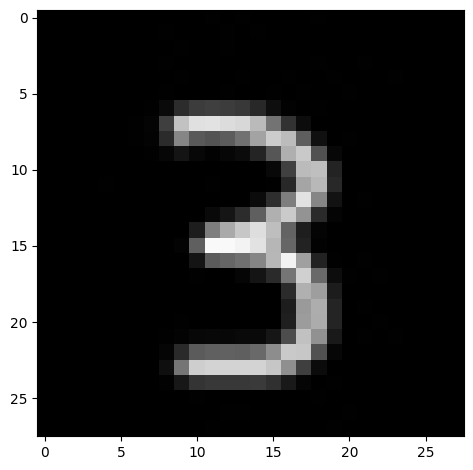

In [22]:
# Classifify your own handwritten digit


model = LogisticRegression(C=1.3,solver= 'liblinear',multi_class='ovr')

model.fit(X_train,y_train)


from skimage.io import imread, imshow
from skimage.transform import resize
testimage = imread("/content/testimage.jpg", as_gray = True)


imshow(testimage)

testimage = testimage.reshape(1,-1)
print(X_train[1].shape)

result = model.predict(testimage)

print('Recognized digit ',result[0])

result_proba = model.predict_proba(testimage)

print('Model confidence:', result_proba)

### **Beginner-Friendly Explanation: Classify Your Own Handwritten Digit**

This code lets you **predict** the digit in your own **handwritten** image using a **Logistic Regression** model. It also tells you how **confident** the model is about its prediction.

---

#### **1. Create and Train the Model**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.3, solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
```

* **LogisticRegression()**:

  * Creates a **logistic regression** model.
* **C=1.3**:

  * Controls how **strict** the model is about avoiding **errors**.
* **solver='liblinear'**:

  * A **fast** solver for **small** datasets.
* **multi\_class='ovr'**:

  * Uses the **One-vs-Rest** strategy for **multi-class** classification.
* **fit(X\_train, y\_train)**:

  * **Trains** the model with your **training** data.

---

#### **2. Load Your Handwritten Image**

```python
from skimage.io import imread, imshow
from skimage.transform import resize

testimage = imread("/content/testimage.jpg", as_gray=True)
imshow(testimage)
```

* **imread()**:

  * Loads your image from the **file path**.
* **as\_gray=True**:

  * Converts the image to **grayscale** (only **black** and **white**).
* **imshow()**:

  * Shows the **loaded** image.

---

#### **3. Prepare the Image for Prediction**

```python
testimage = testimage.reshape(1, -1)
print(X_train[1].shape)
```

* **reshape(1, -1)**:

  * **Flattens** the image from a **2D** matrix (e.g., **28x28**) to a **1D** array (e.g., **784** pixels).
* **print(X\_train\[1].shape)**:

  * Prints the shape of a **single** training sample to **confirm** it matches the shape of your **test** image.

---

#### **4. Make a Prediction**

```python
result = model.predict(testimage)
print('Recognized digit:', result[0])
```

* **predict()**:

  * Uses the **trained** model to **predict** the digit.
* **result\[0]**:

  * Prints the **predicted** digit.

---

#### **5. Check the Model's Confidence**

```python
result_proba = model.predict_proba(testimage)
print('Model confidence:', result_proba)
```

* **predict\_proba()**:

  * Returns the **probability** for each possible digit (**0-9**).
* **result\_proba**:

  * Shows you **how confident** the model is for each digit.

---

#### **6. Expected Output (Example)**

```
Recognized digit: 4
Model confidence: [[0.01, 0.05, 0.02, 0.03, 0.90, 0.01, 0.02, 0.01, 0.02, 0.02]]
```

* The model **predicted** the digit **4** with **90%** confidence.

---

#### **7. Why This is Important**

* **Real-World Testing**:

  * Lets you **test** your model with **new** images.
* **Confidence Check**:

  * Helps you understand how **confident** the model is about its **predictions**.
* **Personalization**:

  * You can try different **handwritten** styles to **challenge** your model.

---

Would you like me to show you how to **improve** this model for even **better** results? 😊
